# **Linear Regression with One Variable using Gradient Descent (from Scratch)**

# Step 1: Import Libraries and Load Data

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data = pd.read_csv("experience_salary.csv")


X = data['YearsExperience']
Y = data['Salary']

data.head()
# data.describe()

# print(X)
# print(Y)

,YearsExperience,Salary
0,1,20000
1,2,25000
2,3,30000
3,4,35000
4,5,40000


# Step 2: Visualize the Data

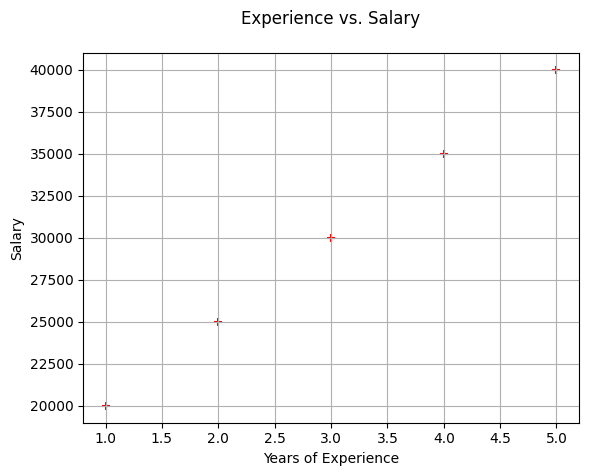

In [23]:
plt.scatter(X,Y, color='red',marker='+')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Experience vs. Salary\n')
plt.grid(True)
plt.show()

# Step 3: Initialize Parameters

In [27]:
m=0
b=0
learning_rate = 0.01
cost_history = [] #store cost values for each epoch
epochs = 1000 # Number of iterations over the entire dataset for gradient descent
n=len(X)

# Step 4: Cost Function and Gradient Descent

In [37]:
# Cost Function: Mean Squared Error

def compute_cost(X,Y,m,b):
  n=len(X)
  Y_pred= m*X + b
  cost = (1/(2*n)) * np.sum( (Y_pred - Y)** 2 )
  return cost


# One Step of Gradient Descent
def gradient_descent(X,Y,m,b,learning_rate):
  n = len(X)
  Y_pred= m*X + b
  error = Y_pred - Y

  dm = (1/n)* np.sum(error * X)
  db = (1/n)* np.sum(error)

  m = m - learning_rate * dm
  b = b - learning_rate * db

  return m,b

# Step 5: Train the Model Using Gradient Descent

In [38]:
# Perform Gradient Descent

for i in range(epochs):
  m,b = gradient_descent(X,Y,m,b,learning_rate)
  cost = compute_cost(X,Y,m,b)
  cost_history.append(cost)

  # Optional: print progress every 100 iterations
  if i % 100 == 0:
    print(f"Iteration {i}: Cost = {cost:.4f}, m = {m:.4f}, b = {b:.4f}")




Iteration 0: Cost = 372445000.0000, m = 1000.0000, b = 300.0000
Iteration 100: Cost = 10339290.7198, m = 7952.2605, b = 4341.3036
Iteration 200: Cost = 7371114.8628, m = 7492.7553, b = 6000.3624
Iteration 300: Cost = 5255034.9744, m = 7104.7517, b = 7401.1786
Iteration 400: Cost = 3746433.6259, m = 6777.1418, b = 8583.9543
Iteration 500: Cost = 2670917.5070, m = 6500.5252, b = 9582.6279
Iteration 600: Cost = 1904157.6714, m = 6266.9647, b = 10425.8555
Iteration 700: Cost = 1357517.1933, m = 6069.7585, b = 11137.8325
Iteration 800: Cost = 967804.7978, m = 5903.2479, b = 11738.9886
Iteration 900: Cost = 689969.9917, m = 5762.6551, b = 12246.5732


In [57]:
# Final Model Parameters

print(f"Final Slope (m): {m}")
print(f"Final Intercept (b): {b}")
print(f"Final Cost (MSE): {cost_history[-1]}")

Final Slope (m): 5645.036311841829
Final Intercept (b): 12671.214245337576
Final Cost (MSE): 493562.56255739694


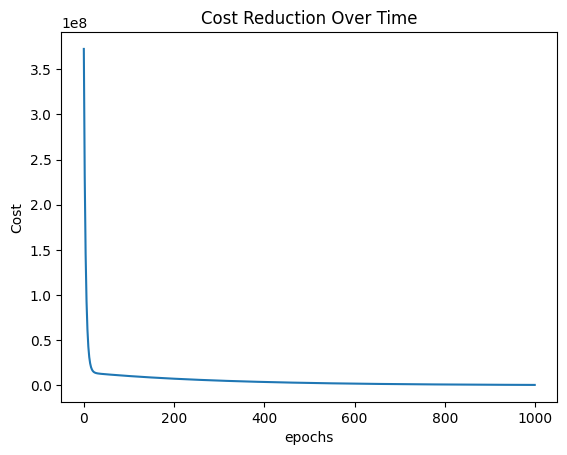

In [58]:
# Plot the Cost Over Iterations

plt.plot(range(epochs), cost_history)
plt.xlabel("epochs")
plt.ylabel("Cost")
plt.title("Cost Reduction Over Time")
plt.show()

# Step 6: Make Predictions

In [59]:
def predict(X):
  return m * X + b

# Predict salary for 6 years of experience
x_test = 6
print(f"Predicted Salary for {x_test} years experience: {predict(x_test)}")



Predicted Salary for 6 years experience: 46541.432116388554


# Step 7: Plot Regression Line

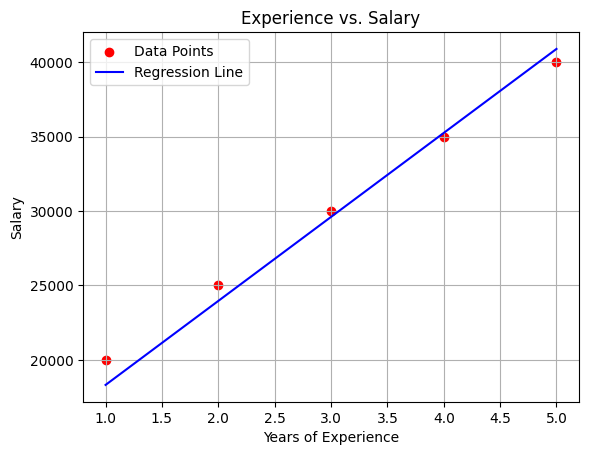

In [61]:
plt.scatter(X,Y, color = 'red', label='Data Points')
plt.plot(X, m*X + b, color='blue', label='Regression Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Experience vs. Salary')
plt.legend()
plt.grid(True)
plt.show()